In [1]:
from matplotlib import pyplot as plt
import numpy as np
from google.colab import files
from skimage import io

uploaded = files.upload()

Saving dif_pattern_pupila_cuadrada_simul.bmp to dif_pattern_pupila_cuadrada_simul.bmp


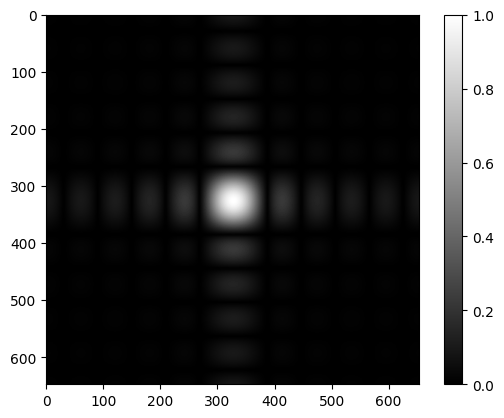

In [3]:
#Se lee el archivo usando skimage io
for i in uploaded.keys():
  filename=i
image = io.imread(filename) #Si es una imagen de mapa de bits a color, debe tratarse cada componente de color por separado.
sizeX=np.shape(image)[1] #Número de columnas
sizeY=np.shape(image)[0] #Número de filas

####################################Hacer esto si la imagen es bmp de 24 bits (imagen a color).
####################################Si la imagen ya es de 8 bits monocromática no es necesario hacer esto.
imageR=np.zeros((sizeY,sizeX))
imageG=np.zeros((sizeY,sizeX))
imageB=np.zeros((sizeY,sizeX))
imagebw=np.zeros((sizeY,sizeX))
for i in range (sizeX):
  for j in range (sizeY):
    imageR[j][i]=image[j][i][0] #Componente Roja (R)
    imageG[j][i]=image[j][i][1] #Componente Verde (G)
    imageB[j][i]=image[j][i][2] #Componente azul (B)
#####################################################################################################
intensity=imageB/255 #Se puede normalizar también respecto al valor máximo usando np.max(). Se toma en este caso la componente roja

plt.imshow(intensity, cmap='gray')
plt.colorbar()

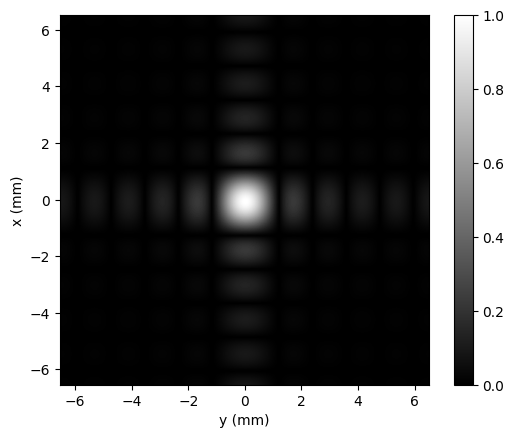

In [9]:
#Convertirmos pixeles a mm:
#por ejemplo si 50 pixles son 1mm:
mm=1/50
N=len(intensity[0,:])
plt.imshow(intensity, cmap='gray',extent=[-N*mm/2,N*mm/2-mm,-N*mm/2,N*mm/2-mm])
plt.ylabel('x (mm)')
plt.xlabel('y (mm)')
plt.colorbar()

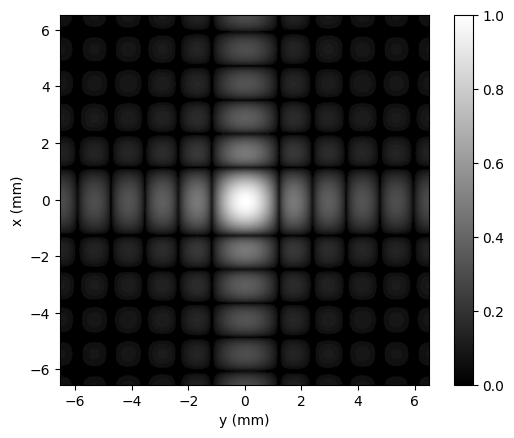

In [13]:
##Calculamos el campo U2
u2=intensity**0.5
plt.imshow(u2, cmap='gray', extent=[-N*mm/2,N*mm/2-mm,-N*mm/2,N*mm/2-mm])
plt.ylabel('x (mm)')
plt.xlabel('y (mm)')
plt.colorbar()

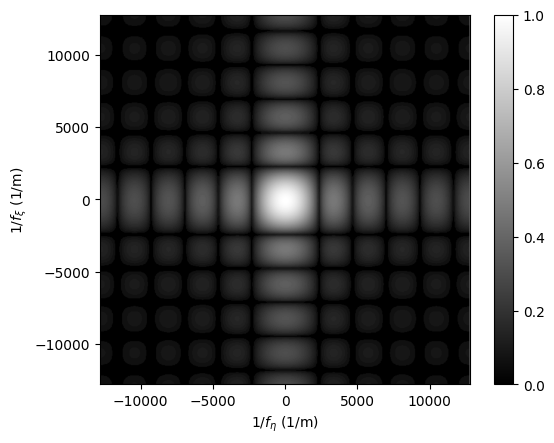

In [21]:
##Pasamos al espacio de las frecuencias
dx=mm*1E-3 #se convierte a m
lam=638E-9 #Longitud de onda en m. (638 nm es un ejemplo, corresponde a la longitud de onda con que se iluminó el objeto)
z=0.8 #(Distancia a la pantalla en metros)
df=dx/(lam*z)
plt.imshow(u2, cmap='gray', extent=[-N*df/2,N*df/2-df,-N*df/2,N*df/2-df])
plt.ylabel('$1/f_\\xi$ (1/m)')
plt.xlabel('$1/f_\eta$ (1/m)')
plt.colorbar()

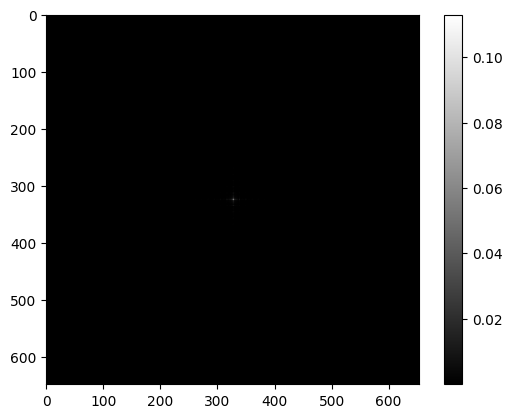

In [24]:
#Calculamos la transformada de Fourier inversa de U2 para hallar una función proporcional a U1

mod_u1=abs(np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(u2))))
plt.imshow(mod_u1, cmap='gray')
plt.colorbar()

Text(0.5, 0, 'x (m)')

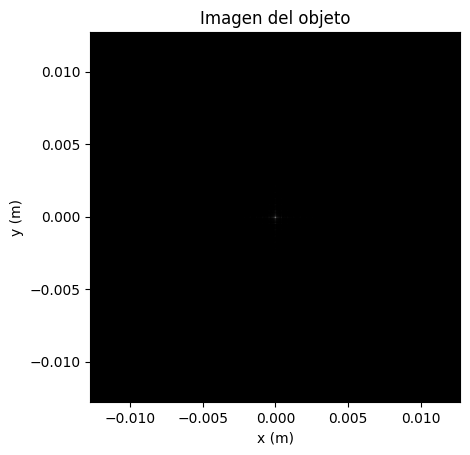

In [25]:
#Calculamos la escala en el espacio (x,y)
#Recordar por ejemplo cuando teníamos señales en función del tiempo: frecuencia_muestreo=1/dt, así la frecuencia va desde -1/(2*dt) hasta 1/(2*dt).
#Luego el df sería df=1/(N*dt) con N el número de muestras. En nuestro caso el dt sería el dx_o (o de objeto).
dx_o=1/(N*df)
plt.imshow(mod_u1, cmap='gray',extent=[-N*dx_o/2,N*dx_o/2-dx_o,-N*dx_o/2,N*dx_o/2-dx_o])
plt.title('Imagen del objeto')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.colorbar()

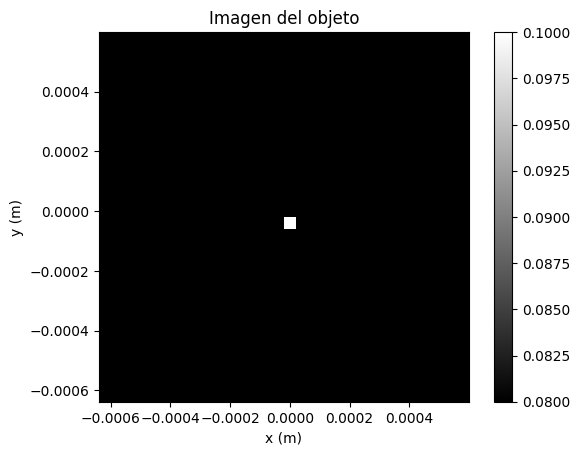

In [31]:
#Hacemos zoom
plt.imshow(mod_u1, cmap='gray',extent=[-N*dx_o/2,N*dx_o/2-dx_o,-N*dx_o/2,N*dx_o/2-dx_o], vmin=0.08, vmax=0.1) ##Recordar que vmin y vmax ajustan la escala del eje z (intensidad de color)
plt.title('Imagen del objeto')
plt.ylabel('y (m)')
plt.xlabel('x (m)')

zoom=0.05 ## valor para el zoom
plt.xlim(-zoom*N*dx_o/2,zoom*N*dx_o/2-dx_o) ## zoom para ver mejor la imagen
plt.ylim(-zoom*N*dx_o/2,zoom*N*dx_o/2-dx_o) ## zoom para ver mejor la imagen
plt.colorbar()

##NOTA: En este ejemplo la imagen es cuadrada por lo tanto (dx,dy), (df_eta,df_xi) y (dx_o,dy_o) son ifuales. Si la imegen no es cuadrada deben ajustarlo.

Hemos obtenido el objeto difractivo a partir de su patrón de difracción. Se trata de una abertura cuadrada como se esperaba.